# Predicciones Bancarias

In [1]:
# Tratamiento de datos

import pandas as pd
import numpy as np

# Gráficos

import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

# Configuration Warning
import warnings
warnings.filterwarnings('ignore')

## Introducción:

The Bank marketing dataset tiene 41188 ejemplos con 20 inputs y 1 output variable. La data es de Portugal esfecificamente de Portuguese Banking Institute. Tiene valores númericos asi como objetos. La meta es construir un modelo de Machine Learning para predecir si un cliente realiza un deposito a plazo o no. Se realizara un analisis tanto en Python como en R.

## Dataset:

El Dataset fue obtenido de UCI Machine Learning Repository y este a su vez lo obtuvo de la direccion de marketing de Portuguese Banking Institution. El dataset esta disponible en http://archive.ics.uci.edu/ml/Bank+Marketing
La información de este dataset se fue recolectando desde Mayo de 2008 hasta Noviembre de 2010. A continuación se detalla las variables que contiene el dataset:

**1. age** - Edad del Cliente - (int64)
**2. job** - Tipo de trabajo - (object)
**3. marital** - Estado marital del cliente - (object)
**4. eduation** - Nivel de educación - (object)
**5. default** - ¿Tiene credito en mora? - (object)
**6. housing** - ¿Tiene prestamo de vivienda? - (object)
**7. loan** - ¿Tiene Prestamo personal? - (object)
**8. contact** - Contacto celular o teléfono - (object)
**9. mounth** - Mes de ultimo contacto con el cliente - (object)

In [2]:
data = pd.read_csv("../../datasets/uci/bank.csv", sep=";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [4]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

## Data Cleaning

In [5]:
data["y"] = (data["y"]=="yes").astype(int)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [6]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [7]:
data["education"] = np.where(data["education"]=="basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.9y", "Basic", data["education"])

data["education"] = np.where(data["education"]=="high.school", "High School", data["education"])
data["education"] = np.where(data["education"]=="professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"]=="university.degree", "University Degree", data["education"])

data["education"] = np.where(data["education"]=="illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"]=="unknown", "Unknown", data["education"])

In [8]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

* 0 = no
* 1 = yes

In [9]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

## Información Estadistica

Datos estadisticos (media)
* Personas que de las respuestas si o no
* Personas con diversos tipos de educacion 

In [10]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [11]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frecuencia de deposito')

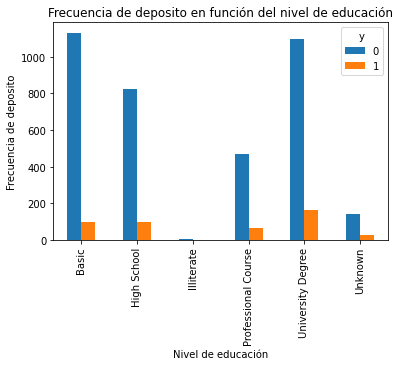

In [55]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de deposito en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de deposito")

Según lo observado en el grafico anterior se puede deducir que las personas con una educación universitaria son mas probables a comprar 

Text(0, 0.5, 'Proporción de clientes')

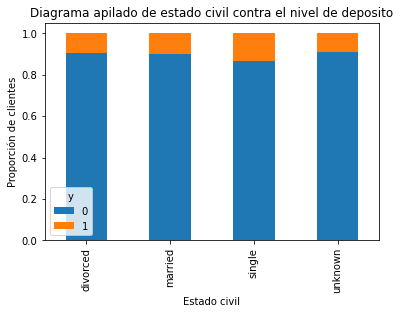

In [54]:
table=pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado de estado civil contra el nivel de deposito")
plt.xlabel("Estado civil")
plt.ylabel("Proporción de clientes")

En el grafico anterior se puede deducir lo siguiente:
* Los clientes que se encuentran solteros son mas probables a realizar compras

Text(0, 0.5, 'Frecuencia de compra del producto')

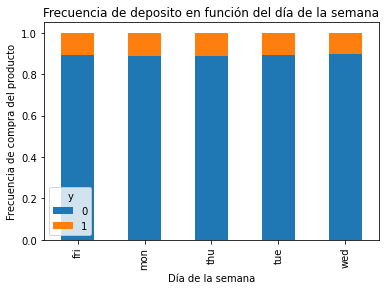

In [53]:
%matplotlib inline
table= pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de deposito en función del día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Frecuencia de compra del producto")

La frecuencia de compras en función de los dias a la semana es muy poco relevante.

Text(0, 0.5, 'Frecuencia de deposito')

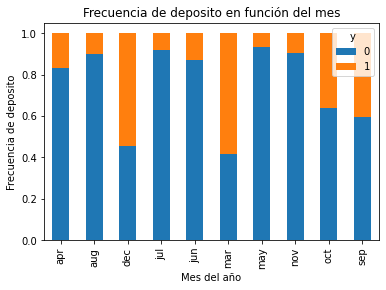

In [56]:
%matplotlib inline
table= pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de deposito en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de deposito")

Los meses que mas compran son Diciembre y Marzo

Text(0, 0.5, 'Cliente')

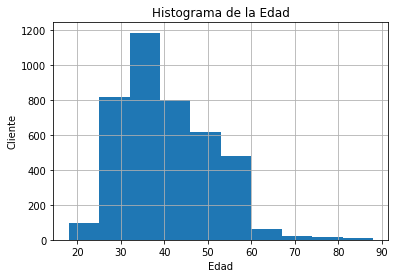

In [16]:
%matplotlib inline
data.age.hist()
plt.title("Histograma de la Edad")
plt.xlabel("Edad")
plt.ylabel("Cliente")

El rango de edad que mas realiza compras se entre los 25 a 60 años

<AxesSubplot:xlabel='age'>

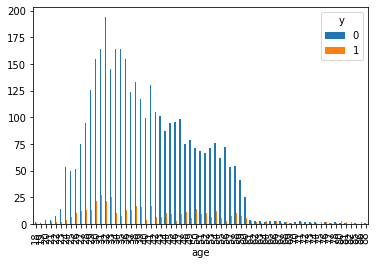

In [17]:
pd.crosstab(data.age, data.y).plot(kind="bar")

### Conversión de las variables categóricas a dummies

In [18]:
categories = ["job", "marital", "education", "housing", "loan", "contact", 
              "month", "day_of_week", "poutcome"]
for category in categories:
    cat_list = "cat"+ "_"+category
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new

In [19]:
data_vars = data.columns.values.tolist()

In [20]:
to_keep = [v for v in data_vars if v not in categories]
to_keep = [v for v in to_keep if v not in ["default"]]

In [21]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'd

In [22]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ['y']
X = [v for v in bank_data_vars if v not in Y]

### Selección de rasgos para el modelo

In [23]:
n = 12

In [24]:
lr = LogisticRegression()

In [25]:
rfe = RFE(lr, n_features_to_select=12)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

In [26]:
print(rfe.support_)

[False False False False  True False False False  True False False False
 False False False  True False False False  True  True False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True False
 False False False False False False False  True False  True]


In [27]:
print(rfe.ranking_)

[42 40 19 45  1 21 26 24  1 36  2  9  6 39  8  1  7 25 43  1  1 41 17 34
 33 47 28 15 46 20 29  4 10 16 44 14 22 35 11  3 37 23  1  1  1  1  1 13
 32  5 30 27 31 38 12  1 18  1]


In [28]:
z=zip(bank_data_vars,rfe.support_, rfe.ranking_)

In [29]:
list(z)

[('age', False, 42),
 ('duration', False, 40),
 ('campaign', False, 19),
 ('pdays', False, 45),
 ('previous', True, 1),
 ('emp.var.rate', False, 21),
 ('cons.price.idx', False, 26),
 ('cons.conf.idx', False, 24),
 ('euribor3m', True, 1),
 ('nr.employed', False, 36),
 ('y', False, 2),
 ('job_admin.', False, 9),
 ('job_blue-collar', False, 6),
 ('job_entrepreneur', False, 39),
 ('job_housemaid', False, 8),
 ('job_management', True, 1),
 ('job_retired', False, 7),
 ('job_self-employed', False, 25),
 ('job_services', False, 43),
 ('job_student', True, 1),
 ('job_technician', True, 1),
 ('job_unemployed', False, 41),
 ('job_unknown', False, 17),
 ('marital_divorced', False, 34),
 ('marital_married', False, 33),
 ('marital_single', False, 47),
 ('marital_unknown', False, 28),
 ('education_Basic', False, 15),
 ('education_High School', False, 46),
 ('education_Illiterate', False, 20),
 ('education_Professional Course', False, 29),
 ('education_University Degree', False, 4),
 ('education_Unkno

In [30]:
cols = ["previous", "euribor3m", "job_blue-collar", "job_retired", "month_aug", "month_dec", 
        "month_jul", "month_jun", "month_mar", "month_nov", "day_of_week_wed", "poutcome_nonexistent"]

In [31]:
X = bank_data[cols]
Y = bank_data["y"]

### Implementación del modelo en Python con scikit-learn

In [32]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X,Y)

LogisticRegression()

Factor de R2

In [33]:
logit_model.score(X,Y)

0.8958485069191552

El modelo es muy elevado

In [34]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.5362541179381424]
1,euribor3m,[-0.5443670397995566]
2,job_blue-collar,[-0.35331387435131545]
3,job_retired,[0.36165159081174486]
4,month_aug,[0.629258889506747]
5,month_dec,[1.1943974572118703]
6,month_jul,[0.9630554140660472]
7,month_jun,[1.0566897056468976]
8,month_mar,[1.6386680234585835]
9,month_nov,[0.45770841910588156]


Lo que mas influye son el mes de marzo y el mes de diciembre

## Validación del modelo logístico

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=0)

In [37]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [38]:
from IPython.display import display, Math, Latex

In [39]:
probs = lm.predict_proba(X_test)

In [40]:
probs

array([[0.95409621, 0.04590379],
       [0.83896646, 0.16103354],
       [0.93216535, 0.06783465],
       ...,
       [0.65098445, 0.34901555],
       [0.97381005, 0.02618995],
       [0.57635748, 0.42364252]])

In [41]:
prediction = lm.predict(X_test)

In [42]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
display(Math(r'\varepsilon\in (0,1), Y_p=\begin{cases}0& si\ p\leq \varepsilon\\1&si\ p >\varepsilon\end{cases}'))

<IPython.core.display.Math object>

In [44]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.045904,0
1,0.161034,1
2,0.067835,0
3,0.062222,0
4,0.042308,0


In [45]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,846
1,390


In [46]:
from sklearn import metrics

In [47]:
metrics.accuracy_score(Y_test, prediction)

0.901294498381877

## Validación cruzada

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring="accuracy", cv=10)

In [50]:
scores

array([0.90533981, 0.88834951, 0.90533981, 0.89563107, 0.90048544,
       0.8907767 , 0.88349515, 0.89320388, 0.89320388, 0.88807786])

In [51]:
scores.mean()

0.8943903101599225

# R y Python